### A.	For the given dataset, obtain the best fit line, obtain SSE, SST and SSR values, calculate the r-squared value and r value
### i.	Perform the above task using LinearRegression() from sklearn
### ii.	Without using the built in function (Using the formula)
### iii.	Plot the regression line using appropriate visualization tool






In [ ]:
#import all the packages
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_excel('/content/LAB2_MAchine learning.xlsx')

In [ ]:
print(df)

   Hours  Marks
0      5      9
1      7     11
2     12     18
3      9     15
4      2      5
5      4      7


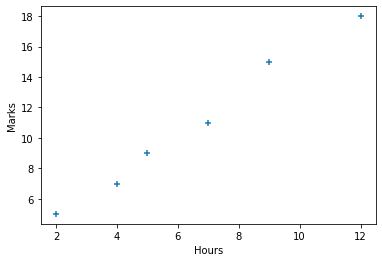

In [ ]:
#plot a scatter plot
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.scatter(df.Hours, df.Marks, marker = "+")


In [ ]:
x = df[["Hours"]]
y = df[["Marks"]]

In [ ]:
#Create linear regression model
model = LinearRegression()
model.fit(x,y)
#fit data in the model


LinearRegression()

In [ ]:
#print the results
#coefficient of determination(R2)
r_sq = model.score(x,y)
print("r^2= ",r_sq)

r^2=  0.9895972624374836


In [ ]:
#the attributes of model are .intercept_ ,which represents the coefficient, b0
#and .coef_,which represents b1

print('intercept: ',model.intercept_)
print('slope: ', model.coef_)

intercept:  [2.05089059]
slope:  [[1.35114504]]


In [ ]:
#make prediction fro x = 10 hours
model.predict([[10]])

array([[15.56234097]])

In [ ]:
#make prediction for all the values of x
yPred = model.predict(x)
print(yPred)

[[ 8.80661578]
 [11.50890585]
 [18.26463104]
 [14.21119593]
 [ 4.75318066]
 [ 7.45547074]]


In [ ]:
df['marksPred'] = yPred 
#addd this column to data frame

In [ ]:
print(df)

   Hours  Marks  marksPred
0      5      9   8.806616
1      7     11  11.508906
2     12     18  18.264631
3      9     15  14.211196
4      2      5   4.753181
5      4      7   7.455471


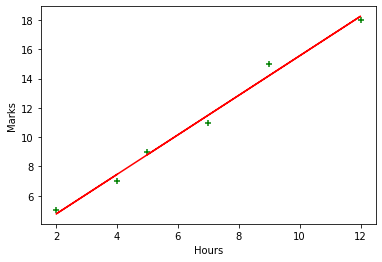

In [ ]:
#%matplotlib inline
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.scatter(df.Hours,df.Marks,color = "green", marker = "+")
plt.plot(df.Hours, df.marksPred, color = 'red')

In [ ]:
import statsmodels.api as sm
x=sm.add_constant(x)
model= sm.OLS(y,x).fit()

In [ ]:
#calculate sse
sse = np.sum((model.fittedvalues - df.Marks)**2)
print(sse)

1.2569974554707404


In [ ]:
#calculate ssr
ssr = np.sum((model.fittedvalues - df.Marks.mean())**2)
print(ssr)

119.5763358778627


In [ ]:
#calculate sst
sst = ssr + sse
print(sst)

120.83333333333344


In [ ]:
xMean= df['Hours'].mean()
yMean= df["Marks"].mean()
print("xMean= ", xMean)
print("yMean= ", yMean)

xMean=  6.5
yMean=  10.833333333333334


In [ ]:
df["xi-xMean"]= df[["Hours"]]-xMean
df["yi-yMean"]= df[["Marks"]]-yMean
print(df)

   Hours  Marks  marksPred  xi-xMean  yi-yMean
0      5      9   8.806616      -1.5 -1.833333
1      7     11  11.508906       0.5  0.166667
2     12     18  18.264631       5.5  7.166667
3      9     15  14.211196       2.5  4.166667
4      2      5   4.753181      -4.5 -5.833333
5      4      7   7.455471      -2.5 -3.833333


In [ ]:
df["(xi-xMean)^2"]= df[["xi-xMean"]]**2
df["(xi-xMean)(yi-yMean)"]= df["xi-xMean"]*df["yi-yMean"]
print(df)

   Hours  Marks  marksPred  ...  yi-yMean  (xi-xMean)^2  (xi-xMean)(yi-yMean)
0      5      9   8.806616  ... -1.833333          2.25              2.750000
1      7     11  11.508906  ...  0.166667          0.25              0.083333
2     12     18  18.264631  ...  7.166667         30.25             39.416667
3      9     15  14.211196  ...  4.166667          6.25             10.416667
4      2      5   4.753181  ... -5.833333         20.25             26.250000
5      4      7   7.455471  ... -3.833333          6.25              9.583333

[6 rows x 7 columns]


In [ ]:
df["(xi-xMean)(yi-yMean)"].sum()

88.5